# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Fajar Sakti Sanubari
- Email: jarseight@gmail.com
- Id Dicoding: fajar_sakti_itru

## Menentukan Pertanyaan Bisnis

1.   Bagaimana tren penggunaan sepeda dalam tahun terakhir?
2.   Apakah cuaca mempengaruhi jumlah penggunaan sepeda?
3.   Pada musim apa penggunaan sepeda mencapai jumlah tertinggi?
4.   Apakah ada kaitan antara temp dan humidity dengan penggunaan sepeda?



## Menyaipkan semua library yang dibuthkan

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

Load Tabel hour.csv

In [197]:
df = pd.read_csv("/content/drive/MyDrive/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Menilai Tipe Data



In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil diatas, terlihat terdapat beberapa kolom yang masih kurang sesuai dengan tipe data yang diinginkan, kolom berikut antara lain:


1.   dteday, bertipe data object, akan diubah menjadi datetime
2.   season, bertipe data integer, akan diubah menjadi string
3.   mnth, bertipe data integer, akan diubah menjadi string
4.   weekday, bertipe data integer, akan diubah menjadi string



- Memerika Missing Values

In [199]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil di atas, terlihat bahwa tidak terdapat missing values

- Memeriksa Duplikasi Data

In [200]:
df.duplicated().sum()

0

Dari hasil di atas, terlihat bahwa tidak ada data yang terduplikat

- Memerika Nilai Statistik

In [201]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Kesimpulan Assesing Data**


*   Tidak terdapat adanya missing values, atau data yang terduplikat
*   Terdapat beberapa data yang tidak sesuai dengan tipe data yang seharusnya digunakan
-   Kolom yr masih merepresentasikan tahun 2011 = 0, 2012 = 1, dan seterusnya, selanjutnya akan diganti menjadi nilai yang berseuaian dengan tahun



### Cleaning Data

- Mengubah tipe data 'dteday'

In [202]:
# mengubah tipe data dteday dari integer menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Mengubah tipe data season, weekday, month, yr dan mengubah nilai pada setiap kolom

In [203]:
# mengubah nilai data weekday menjadi hari yang bersesuaian
df['weekday'] = df['dteday'].dt.day_name()
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [204]:
# mengubah nilai data month menjadi bulan yang bersesuaian
df['mnth'] = df['dteday'].dt.month_name()
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [205]:
# mengubah nilai data season menjadi musim yang bersesuaian

def to_season(season):
    season_name = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_name.get(season)

season_list = []

for season in df['season']:
    season = to_season(season)
    season_list.append(season)

df['season'] = season_list

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [206]:
# mengubah nilai data weathersit menjadi data keterangan cuaca
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rainy',
    4: 'Severe'
})

In [207]:
# mengubah nilai data yr menjadi tahun yang bersesuaian
df['yr'] = df['dteday'].dt.year
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


- Save data yang sudah dibersihkan

In [208]:
df.to_csv(
"hour_cleaned.csv", index=False
)

## Exploratory Data Analysis (EDA)

In [209]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

1. Kelompokkan penyewa sepeda berdasarkan bulan

In [210]:
df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean','sum']
})

cnt                        
           max min        mean     sum
mnth                                  
April      822   1  187.260960  269094
August     941   1  238.097627  351194
December   759   1  142.303439  211036
February   610   1  112.865026  151352
January    559   1   94.424773  134933
July       913   1  231.819892  344948
June       900   1  240.515278  346342
March      957   1  155.410726  228920
May        873   1  222.907258  331686
November   729   1  177.335421  254831
October    963   1  222.158511  322352
September  977   1  240.773138  345991

Hasil diatas menunjukkan bahwa bulan yang memiliki pengguna sepeda terbanyak adalah bulan September, sementara bulan yang pengguna sepeda paling sedikit adalah bulan Januari

2. Kelompokkan pengguna sepeda berdasarkan cuaca

In [211]:
df.groupby(by='weathersit').agg({
    'cnt':['max','min','mean','sum']
})

cnt                         
            max min        mean      sum
weathersit                              
Clear       977   1  204.869272  2338173
Cloudy      957   1  175.165493   795952
Rainy       891   1  111.579281   158331
Severe      164  23   74.333333      223

Hasil diatas menunjukkan bahwa penyewaan sepeda cenderung tinggi disaat cuaca sedang cerah, dan sedikit ketika cuaca sedang buruk

3. Kelompokkan penyewa sepeda berdasarkan holiday

In [212]:
df.groupby(by='holiday').agg({
    'cnt': ['max','min','mean','sum']
})

cnt                        
         max min       mean      sum
holiday                             
0        977   1  190.42858  3214244
1        712   1  156.87000    78435

Hasil diatas menunjukkan bahwa para penyewa sepeda cenderung menyewa sepeda disaat hari kerja

4. Bandingkan penyewa sepeda saat hari kerja dan hari libur

In [213]:
df.groupby(by='weekday').agg({
    'cnt': ['max','min','mean','sum']
})

cnt                        
           max min        mean     sum
weekday                               
Friday     957   1  196.135907  487790
Monday     968   1  183.744655  455503
Saturday   783   1  190.209793  477807
Sunday     776   1  177.468825  444027
Thursday   976   1  196.436665  485395
Tuesday    970   1  191.238891  469109
Wednesday  977   1  191.130505  473048

Hasil diatas menunjukkan bahwa penyewaan sepeda terbanyak berada di hari Rabu

5. Kelompokkan penyewaan sepeda berdasarkan workingday

In [214]:
df.groupby(by='workingday').agg({
    'cnt':['max','min','mean','sum']
})

cnt                         
            max min        mean      sum
workingday                              
0           783   1  181.405332  1000269
1           977   1  193.207754  2292410

Hasil diatas menunjukkan bahwa penyewaan sepeda cenderung lebih banyak disaat hari bekerja

6. Kelompokkan penyewaan sepeda berdasarkan season

In [215]:
df.groupby(by='season').agg({
    'casual': ['max','min','mean','sum'],
    'registered' :['max','min','mean','sum'],
    'cnt' : ['max','min','mean','sum']
})

casual                        registered                          cnt  \
          max min       mean     sum        max min        mean     sum  max   
season                                                                         
Fall      362   0  30.666824  129782        876   0  168.202032  711831  967   
Spring    361   0  46.160581  203522        782   0  162.183488  715067  957   
Summer    350   0  50.287144  226091        886   0  185.729093  835038  977   
Winter    367   0  14.290901   60622        681   0   96.823668  410726  801   

                                 
       min        mean      sum  
season                           
Fall     1  198.868856   841613  
Spring   1  208.344069   918589  
Summer   1  236.016237  1061129  
Winter   1  111.114569   471348

Hasil diatas menunjukkan bahwa penyewaan sepeda memiliki rata-rata paling tinggi pada musim panas, serta paling sedikit pada musim dingin

7. Kelompokkan temp, humidity berdasarkan season

In [216]:
df.groupby(by='season').agg({
    'temp' :['max','min','mean'],
    'atemp' :['max','min','mean'],
    'hum':['max','min','mean']
})

temp                   atemp                    hum                
         max   min      mean     max     min      mean  max   min      mean
season                                                                     
Fall    0.76  0.14  0.423138  0.6818  0.1515  0.415738  1.0  0.16  0.667124
Spring  0.94  0.16  0.544663  0.8788  0.1667  0.520547  1.0  0.16  0.627022
Summer  1.00  0.38  0.706410  1.0000  0.2424  0.656004  1.0  0.16  0.633167
Winter  0.72  0.02  0.299147  0.6515  0.0000  0.298116  1.0  0.00  0.581348

Hasil diatas menunjukkan:



*   Rata-rata temp tertinggi terdapat pada musim panas
*   Rata-rata humidity tertinggi terdapat pada musim gugur






8. Korelasi penyewa dengan aspek-aspek lain

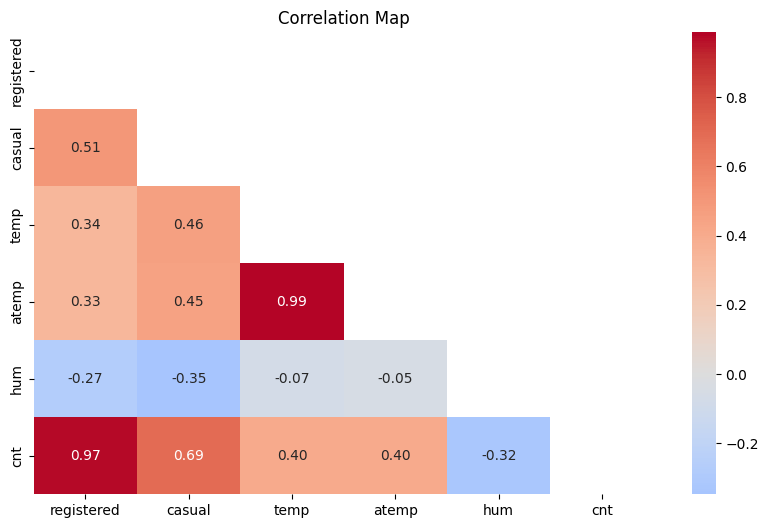

In [217]:
# Hanya gunakan kolom yang Anda butuhkan
selected_cols = ['registered', 'casual', 'temp', 'atemp', 'hum','cnt']
df_selected = df[selected_cols]

# Menghitung matriks korelasi
correlation_matrix = df_selected.corr()

# Membuat heatmap
fig, ax = plt.subplots(figsize=(10,6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
   correlation_matrix,
   annot=True,
   mask=mask,
   cmap="coolwarm",
   center=0,
   fmt=".2f")
plt.title("Correlation Map")
plt.show()

Hasil diatas menunjukkan bahwa:


*   Atemp dan temp memiliki korelasi yang tinggi
*   Humidity memiliki korelasi yang lemah terhadap keempat aspek
-   Casual memiliki korelasi yang terbilang cukup rendah dengan temperatur
-   Humidity tidak berkolerasi dengan casual maupun registered, tetapi memiliki korelasi yang lemah dengan count
-   Registered memiliki korelasi yang rendah dengan temperatur





## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda dalam dua tahun terakhir?

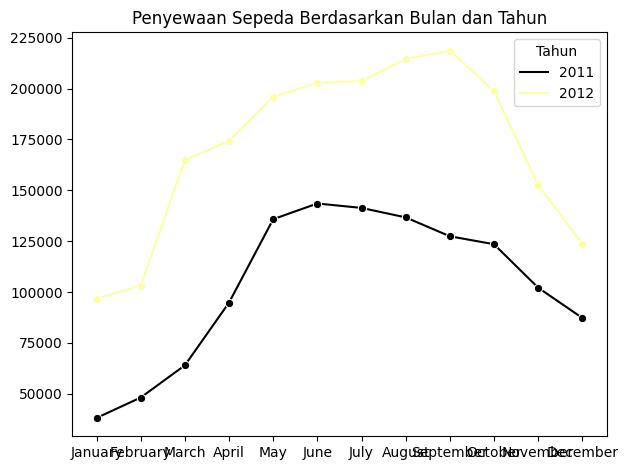

In [218]:
# Mendefinisikan urutan bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Mengubah kolom 'mnth' menjadi Categorical dengan urutan bulan
df['mnth'] = pd.Categorical(df['mnth'], categories=month_order, ordered=True)

monthly_counts = df.groupby(by=["mnth","yr"]).agg({
   "cnt": "sum"
}).reset_index()

monthly_counts = monthly_counts.sort_values('mnth')

sns.lineplot(
   data=monthly_counts,
   x="mnth",
   y="cnt",
   hue="yr",
   palette="inferno",
   marker="o")

plt.title("Penyewaan Sepeda Berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Hasil visualisasi diatas menunjukkan bahwa penyewaan sepeda lebih banyak di tahun 2012, dengan penyewaan sepeda tertinggi di bulan September dan terendah di bulan Januari, sementara di tahun 2011 penyewaan sepeda tertinggi terdapat pada bulan Juni dan terendah pada bulan Januari

### Pertanyaan 2: Apakah cuaca mempengaruhi jumlah penggunaan sepeda?

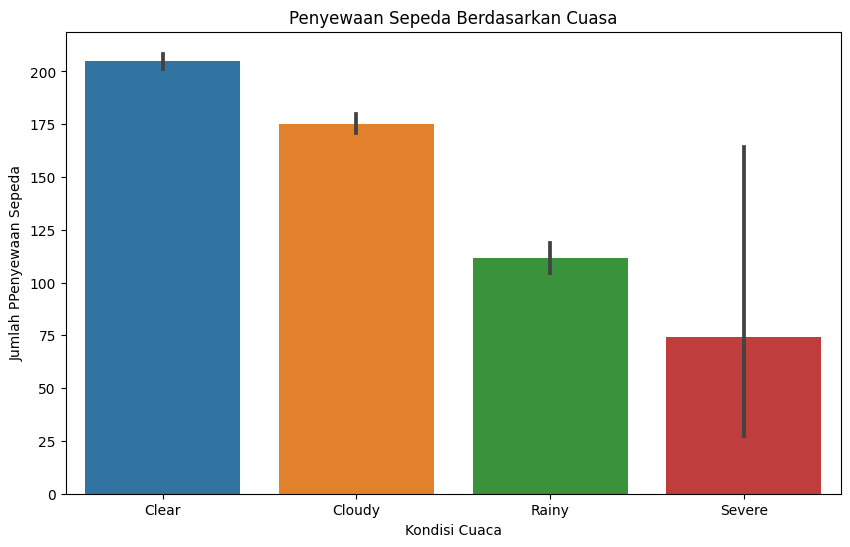

In [219]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=df)

plt.title('Penyewaan Sepeda Berdasarkan Cuasa')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah PPenyewaan Sepeda')
plt.show()

Hasil visualisasi diatas menunjukkan bahwa cuaca berpengaruh terhadap jumlah penyewaan sepeda, dimana pada saat cuaca cerah, jumlah penyewaan sepeda lebih banyak dibanding cuaca yang lain, dan paling sedikit disaat cuaca buruk

### Pertanyaan 3: Pada musim apa penggunaan sepeda mencapai jumlah tertinggi?

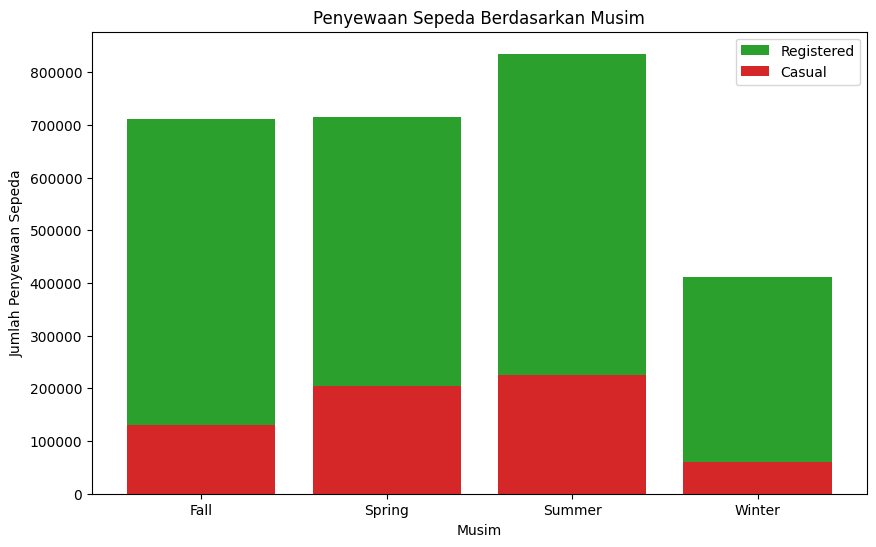

In [220]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat bar chart untuk pengguna terdaftar
plt.bar(
   seasonal_usage['season'],
   seasonal_usage['registered'],
   label='Registered',
   color='tab:green'
)

# Membuat bar chart untuk pengguna casual
plt.bar(
   seasonal_usage['season'],
   seasonal_usage['casual'],
   label='Casual',
   color='tab:red'
)

plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.legend()
plt.show()

Hasil dari visualisasi diatas menunjukkan bahwa musim panas merupakan musim yang memiliki banyak penyewaan sepeda, sementara paling sedikit pada musim dingin

### Pertanyaan 4: Apakah ada kaitan antara temp dan humidity dengan penggunaan sepeda?

Text(0.5, 1.0, 'Keterkaitan antara Humidity dan Count')

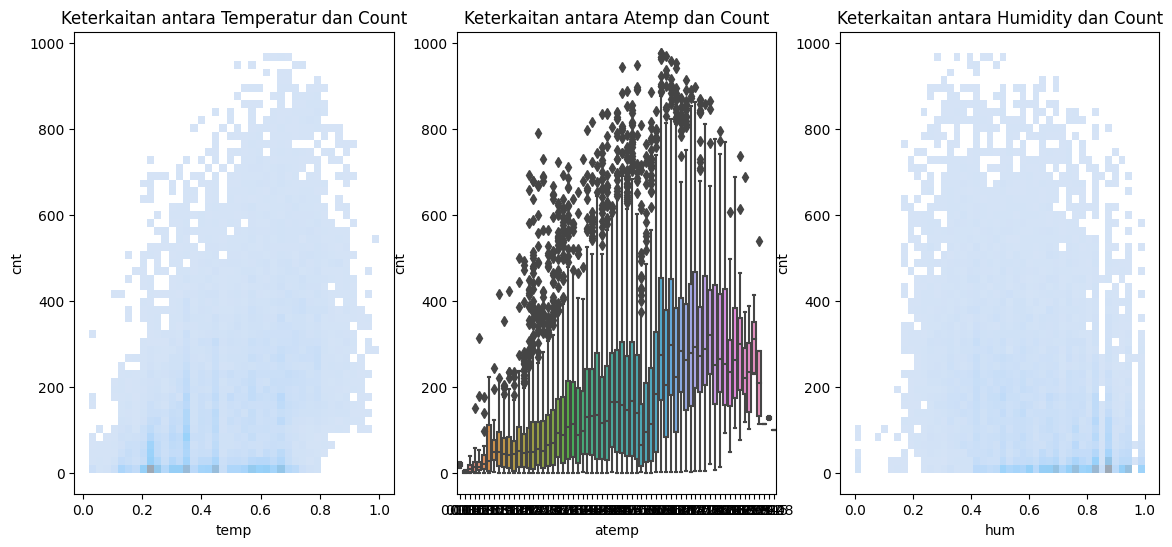

In [221]:
plt.figure(figsize=(14, 6))

# Histogram untuk 'temp' dan 'count'
plt.subplot(1, 3, 1)
sns.histplot(
   x='temp',
   y='cnt',
   data=df,
   element="step",
   stat="density",
   kde=True,
   alpha=0.5
)
plt.title('Keterkaitan antara Temperatur dan Count')

# Box plot untuk 'atemp' dan 'count'
plt.subplot(1, 3, 2)
sns.boxplot(
   x='atemp',
   y='cnt',
   data=df,
   orient="v"
)
plt.title('Keterkaitan antara Atemp dan Count')

# Histogram untuk 'hum' dan 'count'
plt.subplot(1, 3, 3)
sns.histplot(
   x='hum',
   y='cnt',
   data=df,
   element="step",
   stat="density",
   kde=True,
   alpha=0.5
)
plt.title('Keterkaitan antara Humidity dan Count')

Hasil visualisasi diatas menunjukkan bahwa:


1.   Hubungan antara temperatur dan atemp dengan jumlah penyewaan sepeda menunjukkan korelasi yang positif, dan berbanding lurus. Semakin meningkat temperatur, maka semakin meningkat jumla penyewaan sepeda
2.   Hubungan antara humidity dengan penyewaan sepeda berbanding terbalik, semakin tinggi humidity semakin rendah penyewaan sepeda



## Conclusion

- Conclusion pertanyaan 1: Bagaimana tren penggunaan sepeda dalam dua tahun terakhir?
Tren penggunaan sepeda dalam dua tahun terakhir mengalami perkembangan. Penggunaan sepeda lebih banyak terdapat pada tahun 2012. Dapat dibuktikan dengan visualisasi diatas bahwa tren penggunaan sepeda dalam dua tahun terakhir mengalami naik turun, dan mencapai titik puncak pada bulan September pada 2012, serta mencapai puncak pada bulan Juni pada 2011.
- Conclusion pertanyaan 2: Apakah cuaca mempengaruhi jumlah penggunaan sepeda?
Dengan visualisasi diatas, dapat disimpulkan bahwa cuaca mempengaruhi jumlah penggunaan sepeda. Penggunaan sepeda lebih banyak pada cuaca cerah, diikuti dengan cuaca berawan, selanjutnya ada cuaca hujan dan terakhir diikuti oleh cuaca ekstrim dengan penyewaan sepeda yang paling kecil
- Conclusion pertanyaan 3: Pada musim apa penggunaan sepeda mencapai jumlah tertinggi?
Musim panas memiliki penyewaan paling tinggi, baik casual dan registered user. Pada visualisasi diatas terlihat bahwa penyewaan sepeda cenderung banyak pada musim yang memiliki suhu hangat, seperti musim panas, musim semi dan musim gugur. Sementara pada suhu tinggi seperti musim dingin, penyewaan sepeda cenderung lebih sedikit
- Conclusion pertanyaan 4: Apakah ada kaitan antara temp dan humidity dengan penggunaan sepeda?
Ya. Terdapat keterkaitan antara temperatur dan kelembapan terhadap penggunaan sepeda. Penggunaan sepeda cenderung lebih banyak ketika temperatur lebih hangat. Sebaliknya, penggunaan sepeda cenderung lebih banyak ketika kelembapan udara lebih rendah.